### Dataset Information

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

<b>Content</b>

- Timestamp
- Age
- Gender
- Country
- state: If you live in the United States, which state or territory do you live in?
- self_employed: Are you self-employed?
- family_history: Do you have a family history of mental illness?
- treatment: Have you sought treatment for a mental health condition?
- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
- no_employees: How many employees does your company or organization have?
- remote_work: Do you work remotely (outside of an office) at least 50% of the time?
- tech_company: Is your employer primarily a tech company/organization?
- benefits: Does your employer provide mental health benefits?
- care_options: Do you know the options for mental health care your employer provides?
- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- leave: How easy is it for you to take medical leave for a mental health condition?
- mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
- phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
- coworkers: Would you be willing to discuss a mental health issue with your coworkers?
- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
- phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
- mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- comments: Any additional notes or comments

### Objective

Articles are frequently published explaining how men never want to talk about mental health issues and how, on average, men hold more negative attitudes toward mental health issues than women.
This analysis tries to determine we can see the same pattern in the specific field that is the tech work environment. 

### Method

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'

#### First look at data

In [2]:
# Importing dataset
tech = pd.read_csv('survey.csv')

In [3]:
tech.shape

(1259, 27)

In [4]:
tech.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

#### Cleaning dataset

In [5]:
# Clean gender
tech['Gender'] = [x.lower().replace('cis','').strip() for x in tech['Gender']]

# find male gender
male = ['m', 'male', 'male-ish', 'maile', 'mal', 'male ()', 'make',
       'guy (-ish) ^_^', 'man', 'msle', 'mail', 'malr', 'ostensibly male, unsure what that really means']
male_clean = {x: 'male' for x in male}

# find female gender
female = ['female', 'f', 'woman', 'femake', 'female ()', 'femail']

female_clean = {x: 'female' for x in female}

# map male and female
gender_clean = {**male_clean , **female_clean}
tech['Gender'] = tech['Gender'].map(gender_clean)

# fill nulls with other
tech['Gender'] = tech['Gender'].fillna('other')

# value counts
tech['Gender'].value_counts()

male      993
female    246
other      20
Name: Gender, dtype: int64

Unbalanced population between men and women - use relative number

In [6]:
# select columns
gender_att = tech[['Gender', 'treatment', 'mental_health_consequence', 'coworkers', 
                  'supervisor', 'mental_health_interview', 'mental_vs_physical']]

# drop others
gender_att = gender_att.loc[gender_att['Gender'] != 'other']
gender_att

,Gender,treatment,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical
0,female,Yes,No,Some of them,Yes,No,Yes
1,male,No,Maybe,No,No,No,Don't know
2,male,No,No,Yes,Yes,Yes,No
3,male,Yes,Yes,Some of them,No,Maybe,No
4,male,No,No,Some of them,Yes,Yes,Don't know
...,...,...,...,...,...,...,...
1254,male,Yes,No,Some of them,Some of them,No,Don't know
1255,male,Yes,No,Some of them,Yes,No,Yes
1256,male,Yes,Yes,No,No,No,No
1257,female,No,Yes,No,No,No,No


### Results

In [7]:
# Gender and treatment
crosstab_treatment = pd.crosstab(index=gender_att["Gender"], columns=gender_att['treatment'], normalize='index')\
    .round(4)*100
crosstab_treatment
crosstab_treatment = crosstab_treatment[['Yes', 'No']]
crosstab_treatment

treatment,Yes,No
Gender,,
female,68.70,31.30
male,45.52,54.48


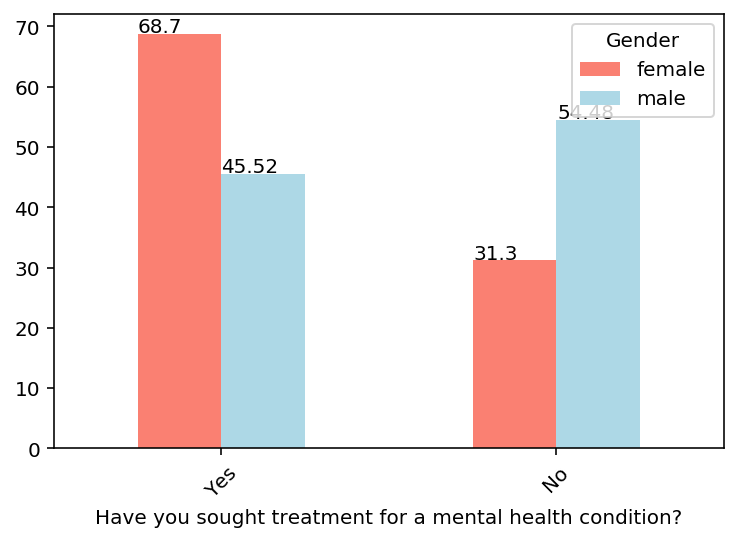

In [8]:
ax = crosstab_treatment.T.plot.bar(color = ['salmon', 'lightblue'])
plt.xticks(rotation = 45)
plt.xlabel('Have you sought treatment for a mental health condition?')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

- 67 % of women have taken mental health treatment 
- 45 % of men have taken mental health treatment

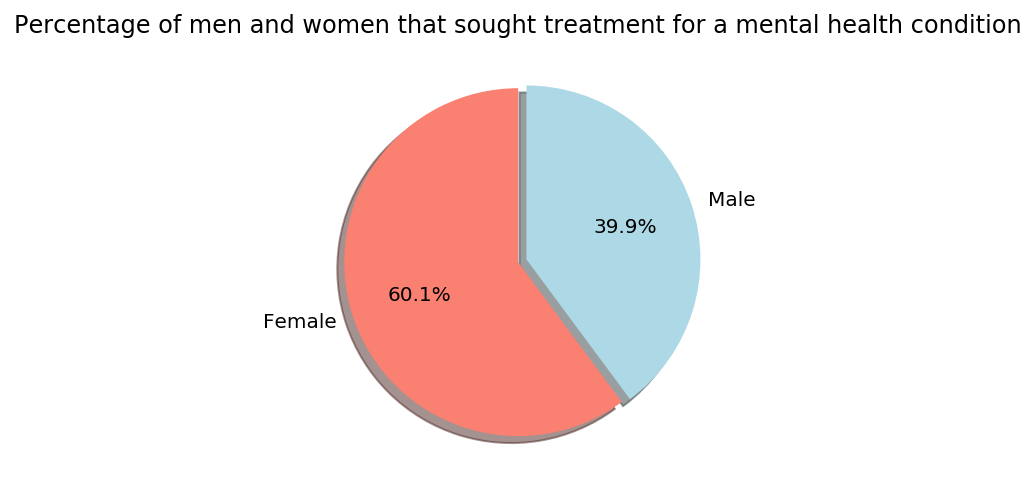

In [9]:
# percentage of men and women that answered yes
plt.pie(crosstab_treatment['Yes'], explode = (0, 0.05), labels = ['Female','Male'], 
        colors = ['salmon', 'lightblue'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of men and women that sought treatment for a mental health condition')
plt.show()

In [11]:
# Gender and mental_health_consequence - Do you think that discussing a mental health issue with your employer would have negative consequences?
crosstab_mental_health_consequence = pd.crosstab(index=gender_att["Gender"], columns=gender_att['mental_health_consequence'], normalize='index')\
    .round(4)*100
crosstab_mental_health_consequence = crosstab_mental_health_consequence[['Yes', 'No', 'Maybe']]
crosstab_mental_health_consequence

mental_health_consequence,Yes,No,Maybe
Gender,,,
female,26.83,29.27,43.90
male,21.75,41.59,36.66


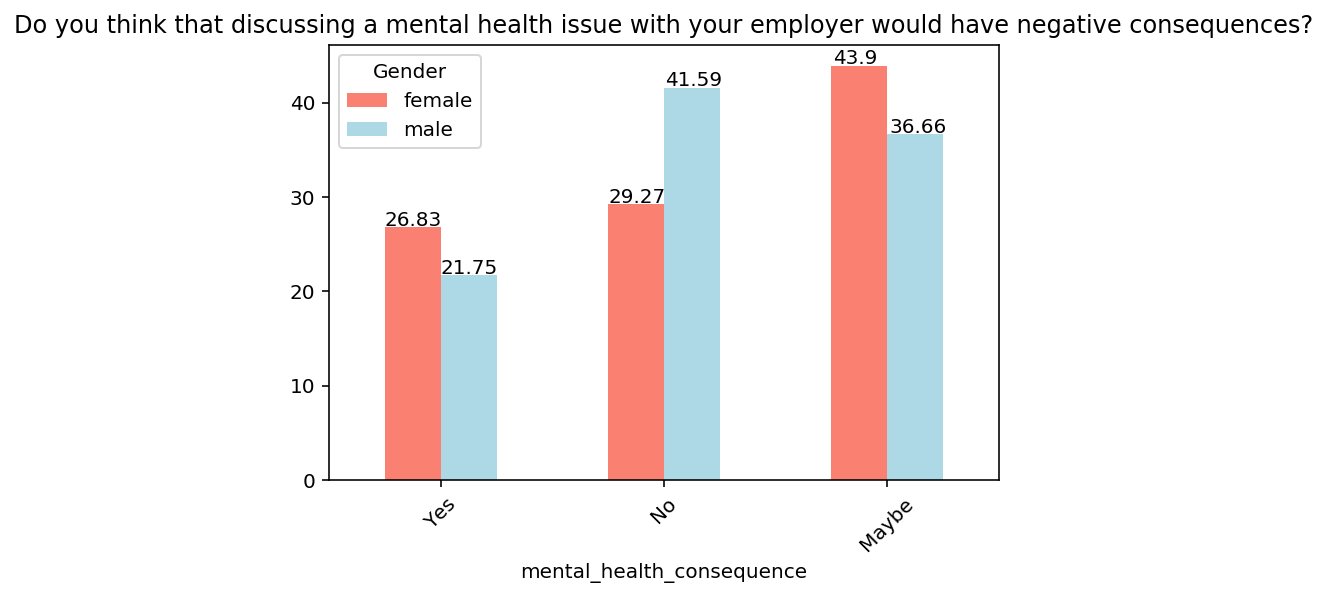

In [12]:
ax = crosstab_mental_health_consequence.T.plot.bar(color = ['salmon', 'lightblue'])
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Do you think that discussing a mental health issue with your employer would have negative consequences?')
plt.show()

- Women: 43% think that discussing a mental health issue with their employer might have negative consequences, 23% don't think so and 27% yes.
- Men: 37% think that discussing a mental health issue with their employer might have negative consequences, 42% don't think so and 22% yes.

In [13]:
# Gender and mental_health_consequence without "Maybe"
gender_att['mental_health_consequence'].replace("Maybe", np.nan, inplace=True)

crosstab_mental_health_consequence = pd.crosstab(index=gender_att["Gender"], columns=gender_att['mental_health_consequence'], normalize='index')\
    .round(4)*100
crosstab_mental_health_consequence

mental_health_consequence,No,Yes
Gender,,
female,52.17,47.83
male,65.66,34.34


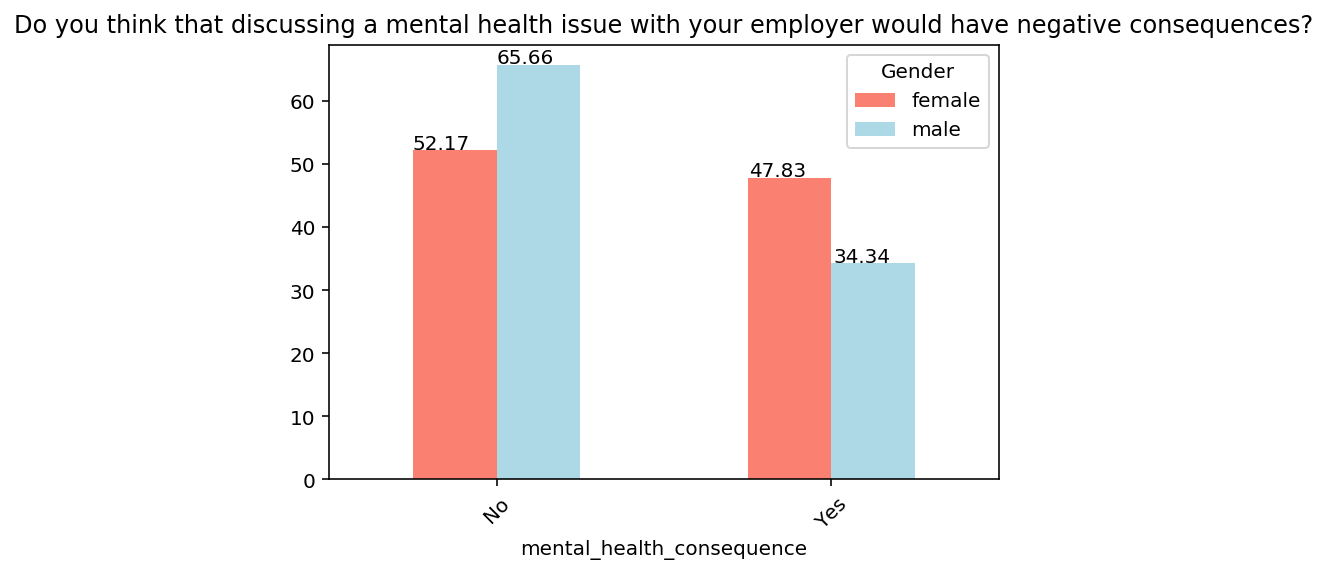

In [15]:
ax = crosstab_mental_health_consequence.T.plot.bar(color = ['salmon', 'lightblue'])
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Do you think that discussing a mental health issue with your employer would have negative consequences?')
plt.show()

In [16]:
# 1. Gender and coworkers
crosstab_coworkers = pd.crosstab(index=gender_att["Gender"], columns=gender_att['coworkers'],normalize='index')\
    .round(4)*100
crosstab_coworkers = crosstab_coworkers[['Yes', 'No', 'Some of them']]
crosstab_coworkers

coworkers,Yes,No,Some of them
Gender,,,
female,13.41,23.58,63.01
male,18.63,19.94,61.43


- The majority of men (61%) and women (63%) think that it depends on the coworkers. More men will be willing to talk to a coworker (18% against 13% of women)

In [17]:
# 2. Gender and supervisor
crosstab_supervisor = pd.crosstab(index=gender_att["Gender"], columns=gender_att['supervisor'], normalize='index')\
    .round(4)*100
crosstab_supervisor = crosstab_supervisor[['Yes', 'No', 'Some of them']]
crosstab_supervisor

supervisor,Yes,No,Some of them
Gender,,,
female,30.49,34.96,34.55
male,43.71,30.41,25.88


- Men seem more confortable talking about mental health issues with there supervisor (43% against 30% of women)

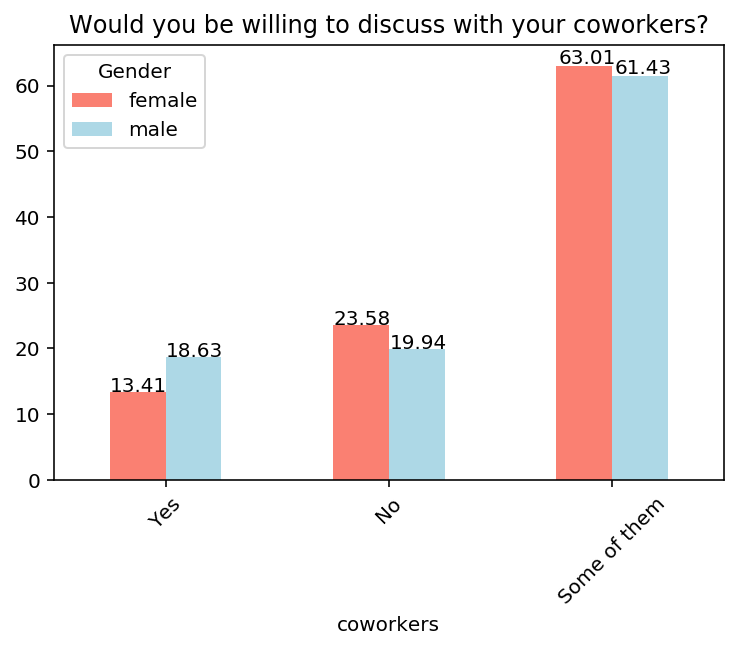

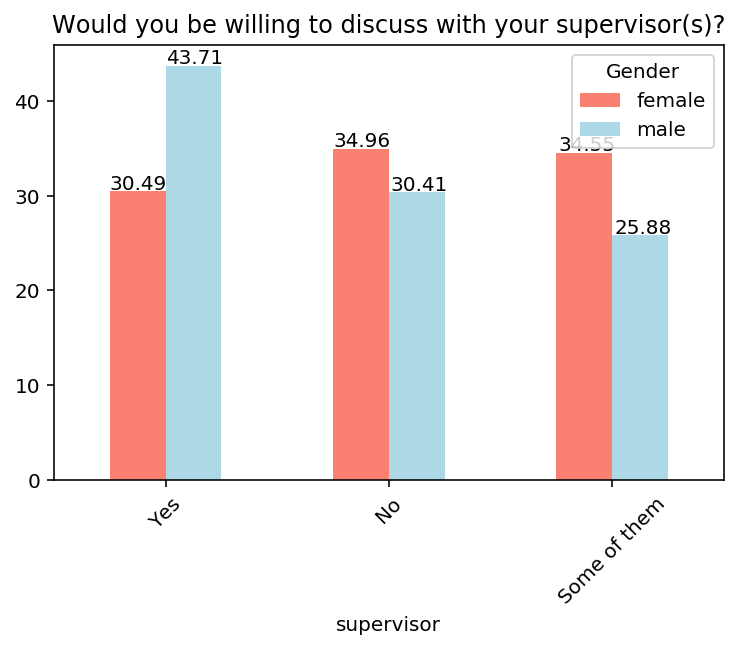

In [20]:
ax1 = crosstab_coworkers.T.plot.bar(color = ['salmon', 'lightblue'])
plt.xticks(rotation = 45)
for p in ax1.patches:
    ax1.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Would you be willing to discuss with your coworkers?')
plt.show()

ax2 = crosstab_supervisor.T.plot.bar(color = ['salmon', 'lightblue'])
plt.xticks(rotation = 45)
for p in ax2.patches:
    ax2.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Would you be willing to discuss with your supervisor(s)?')
plt.show()

In [21]:
# Gender and mental_health_interview
crosstab_mental_health_interview = pd.crosstab(index=gender_att["Gender"], columns=gender_att['mental_health_interview'], normalize='index')\
    .round(4)*100
crosstab_mental_health_interview = crosstab_mental_health_interview[['Yes', 'No', "Maybe"]]
crosstab_mental_health_interview

mental_health_interview,Yes,No,Maybe
Gender,,,
female,0.81,90.65,8.54
male,3.63,77.84,18.53


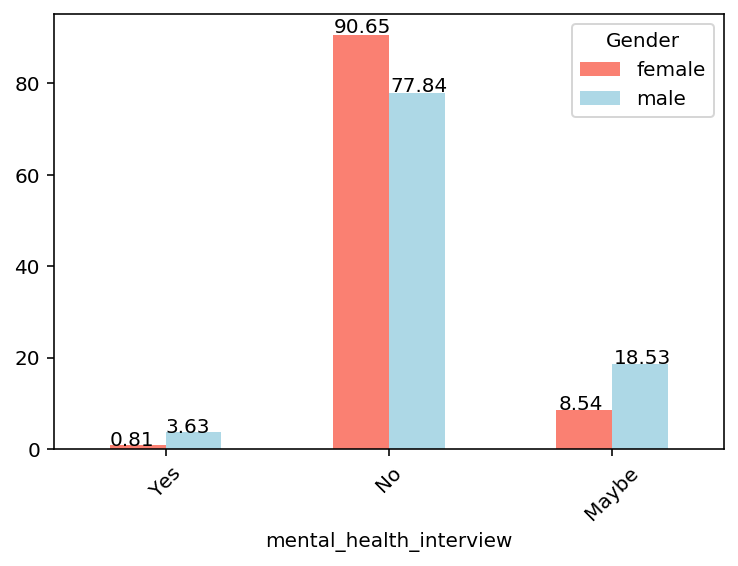

In [22]:
ax = crosstab_mental_health_interview.T.plot.bar(color = ['salmon', 'lightblue'])
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

- Women: the high majority (90%) won't mention a mental health issue during an interview, 8% will maybe mention it and not even 1% will mention it.
- Men: the majority (77%) won't mention a mental health issue during an interview, 2% will maybe mention it and not even 3% will mention it.

- It seems that men are more confortable with mental health issue in the work environment than women

In [23]:
# Gender and mental_health_consequence without "Maybe"
gender_att['mental_health_interview'].replace("Maybe", np.nan, inplace=True)

crosstab_mental_health_interview = pd.crosstab(index=gender_att["Gender"], columns=gender_att['mental_health_interview'], normalize='index')\
    .round(4)*100
crosstab_mental_health_interview

mental_health_interview,No,Yes
Gender,,
female,99.11,0.89
male,95.55,4.45


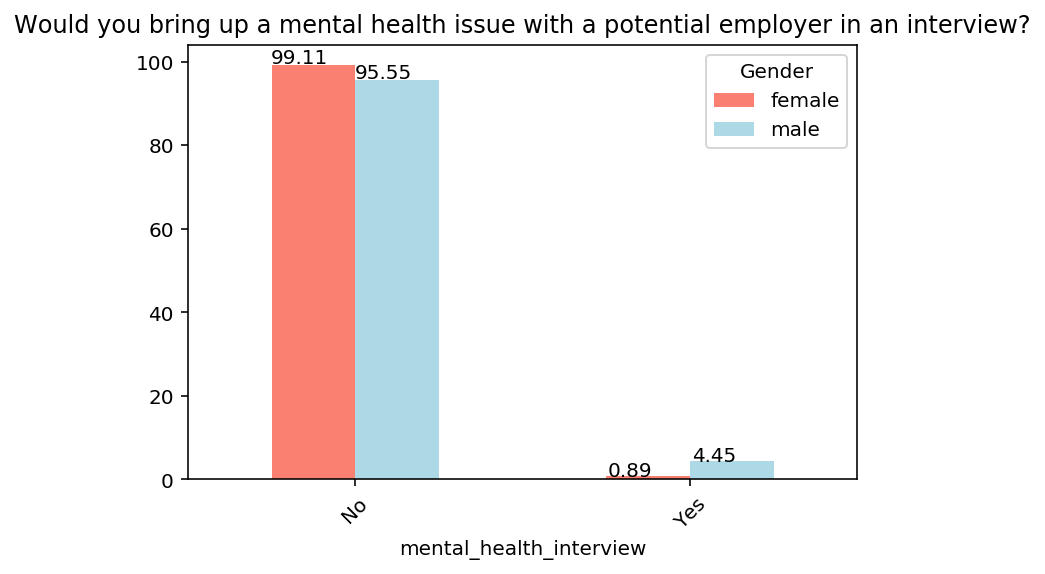

In [25]:
ax = crosstab_mental_health_interview.T.plot.bar(color = ['salmon', 'lightblue'])
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Would you bring up a mental health issue with a potential employer in an interview?')
plt.show()

In [26]:
# Gender and mental_vs_physical
crosstab_mental_vs_physical = pd.crosstab(index=gender_att["Gender"], columns=gender_att['mental_vs_physical'], normalize='index')\
    .round(4)*100
crosstab_mental_vs_physical = crosstab_mental_vs_physical[['Yes', 'No', "Don't know"]]

crosstab_mental_vs_physical

mental_vs_physical,Yes,No,Don't know
Gender,,,
female,29.27,26.42,44.31
male,26.38,26.79,46.83


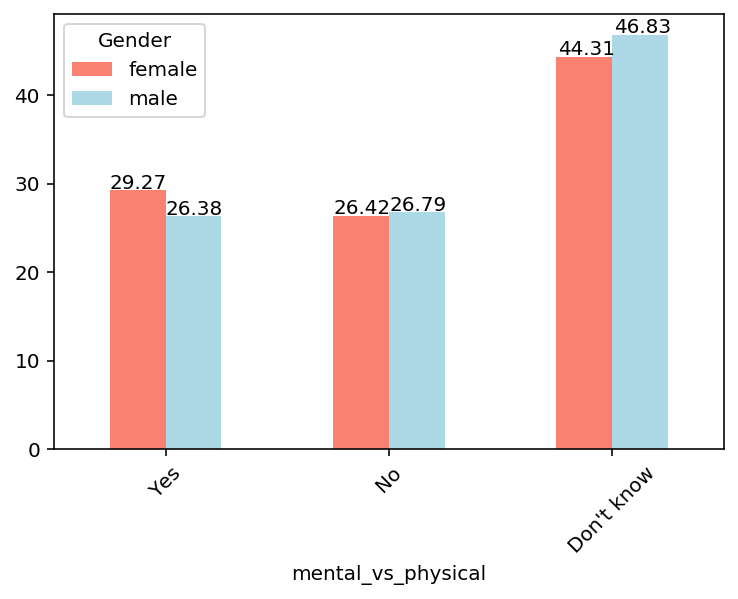

In [27]:
ax = crosstab_mental_vs_physical.T.plot.bar(color = ['salmon', 'lightblue'])
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

- For both women and men, the majority doesn't know.

In [28]:
# Gender and mental_vs_physical without "Don't know"
gender_att['mental_vs_physical'].replace("Don't know", np.nan, inplace=True)

crosstab_mental_vs_physical = pd.crosstab(index=gender_att["Gender"], columns=gender_att['mental_vs_physical'], normalize='index')\
    .round(4)*100
crosstab_mental_vs_physical

mental_vs_physical,No,Yes
Gender,,
female,47.45,52.55
male,50.38,49.62


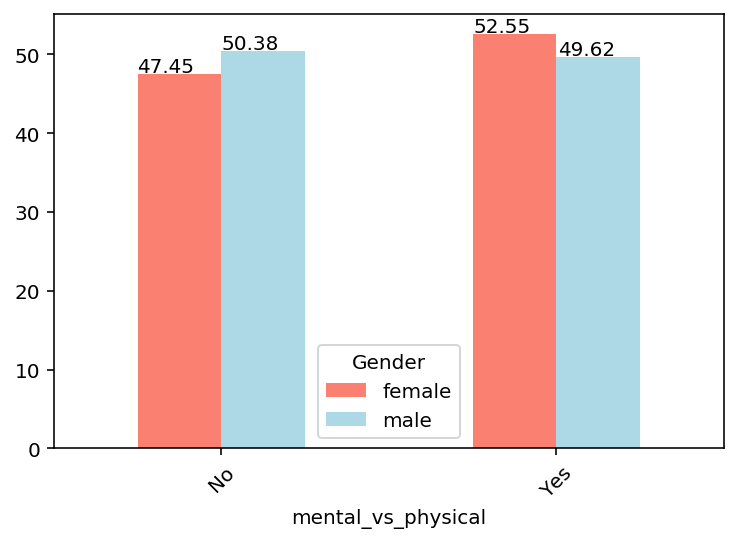

In [29]:
ax = crosstab_mental_vs_physical.T.plot.bar(color = ['salmon', 'lightblue'])
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

Without the "Don't know" answer: 
- for men it's really close 50/50
- for women it's a little more spread out with a majority for No